# Explore Nucleation Rates
See how nucleation rates change as a function of temperature.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json

## Load Results
Each of the result folders in [the void tracking directory](../1_void-tracking) are named after the temperature and contain a file which contains the void growth and mobility functions.

In [2]:
dynamics_terms = []
for path in Path('../1_void-tracking/output/').glob('8bitTIFF-*/rate-parameters-bayesian.json'):
    # Get the temperature
    temperature = float(path.parent.name.split("-")[-1][:-1])  # Directories are named [...]-[temp]C
    terms = {'temp': temperature}
    
    # Load the model parameters
    params = json.loads(path.read_text())
    
    # Make means their own columns
    terms.update(dict(zip(params['order'], params['mean'])))
    
    # Store the covariance, but also put in the standard deviations
    terms.update(dict(zip(
        [x + "-std" for x in params['order']], 
        np.sqrt(np.diag(params['covariance']))
    )))
    terms['covariance'] = params['covariance']
    
    dynamics_terms.append(terms)
dynamics_terms = pd.DataFrame(dynamics_terms).sort_values('temp')

In [3]:
dynamics_terms

,temp,nucleation_rate,dissolution_prob,nucleation_rate-std,dissolution_prob-std,covariance
0,525.0,0.764171,0.031653,0.030801,0.001232,"[[0.000948701162390158, -3.125424056844795e-07..."
4,550.0,0.065982,0.020038,0.008767,0.002595,"[[7.68645380479902e-05, 1.7143289239841637e-08..."
2,575.0,0.405927,0.039527,0.021708,0.002059,"[[0.0004712314509723412, 1.3156616172917435e-0..."
5,600.0,0.218790,0.014714,0.015350,0.001040,"[[0.00023562807987110733, 9.819123752725069e-0..."
3,625.0,0.965483,0.018284,0.034044,0.000644,"[[0.001159025074778016, -1.9346499907902673e-0..."
1,650.0,0.199823,0.027774,0.013290,0.001818,"[[0.00017661472782903032, 3.377439166953053e-0..."


## Plot the Effect of Temperature on Growth
See if there is a consistent trend

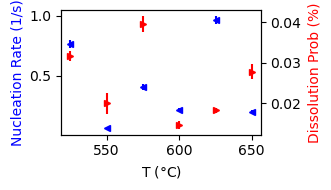

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

ax.errorbar(dynamics_terms['temp'], dynamics_terms['nucleation_rate'], yerr=dynamics_terms['nucleation_rate-std'], color='blue', fmt='<', ms=4)

ax2 = ax.twinx()
ax2.errorbar(dynamics_terms['temp'], dynamics_terms['dissolution_prob'], yerr=dynamics_terms['dissolution_prob-std'], color='red', fmt='>', ms=4)

ax.set_xlabel('T ($\\degree$C)')
ax.set_ylabel('Nucleation Rate (1/s)', color='blue')
ax2.set_ylabel('Dissolution Prob (%)', color='red')


fig.tight_layout()
fig.savefig('figures/nucleation-vs-temperature.png', dpi=320)